In [5]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
wine = load_wine()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, random_state=42)



In [8]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [10]:
y_pred_test

array([2, 0, 2, 0, 1, 0, 2, 2, 1, 0, 2, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       2, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0, 0, 2, 2, 2, 1, 0, 1, 1, 0,
       1])

In [11]:
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

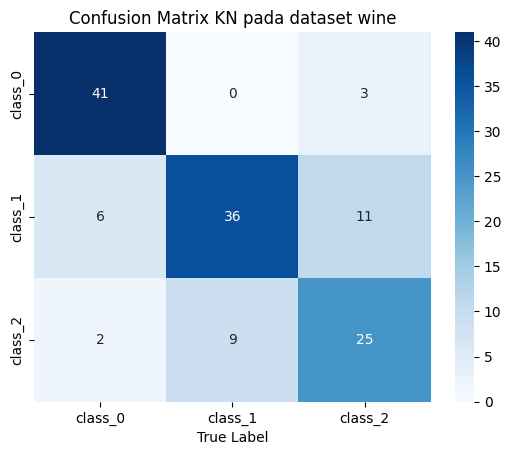

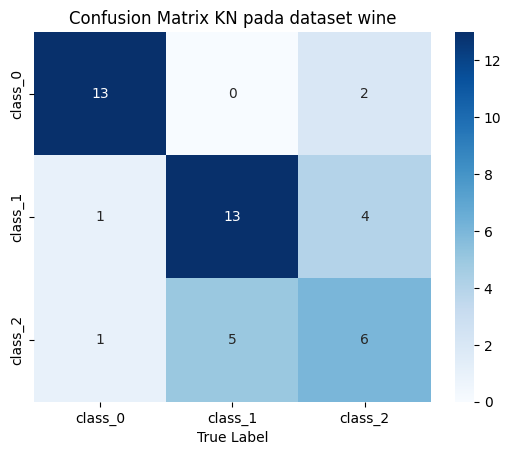

              precision    recall  f1-score   support

     class_0       0.84      0.93      0.88        44
     class_1       0.80      0.68      0.73        53
     class_2       0.64      0.69      0.67        36

    accuracy                           0.77       133
   macro avg       0.76      0.77      0.76       133
weighted avg       0.77      0.77      0.76       133

              precision    recall  f1-score   support

     class_0       0.87      0.87      0.87        15
     class_1       0.72      0.72      0.72        18
     class_2       0.50      0.50      0.50        12

    accuracy                           0.71        45
   macro avg       0.70      0.70      0.70        45
weighted avg       0.71      0.71      0.71        45



In [12]:
sns.heatmap(cm_train, annot=True, cmap="Blues", xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel("Predicted Label")
plt.xlabel("True Label")
plt.title("Confusion Matrix KN pada dataset wine")
plt.show()

sns.heatmap(cm_test, annot=True, cmap="Blues", xticklabels=wine.target_names, yticklabels=wine.target_names)
plt.xlabel("Predicted Label")
plt.xlabel("True Label")
plt.title("Confusion Matrix KN pada dataset wine")
plt.show()

print(classification_report(y_train, y_pred_train, target_names=wine.target_names))
print(classification_report(y_test, y_pred_test, target_names=wine.target_names))



In [14]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [23]:
import numpy as np


def metric(y_pred, y_true, label):
    n_label = len(label)
    counter = np.zeros((n_label, n_label))
    for i in range(len(y_pred)):
        counter[y_pred[i]][y_true[i]] += 1
    print(counter)

    accuracy = np.sum([counter[i][i] for i in range(n_label)])/len(y_pred)
    presicion = []
    recall = []
    f1score = []

    for i in range(n_label):
        presicion.append(counter[i][i] / np.sum([counter[k][i] for k in range(n_label)]))
        recall.append(counter[i][i] / np.sum([counter[i][k] for k in range(n_label)]))
        f1score.append((2*presicion[-1]*recall[-1]) / (presicion[-1]+recall[-1]))
        print("\nclass:", label[i])
        print("accuracy:", accuracy)
        print("presicion:", presicion[-1])
        print("recall:", recall[-1])
        print("f1 score:", f1score[-1])
        print()

    

metric(y_train, y_pred_train, wine.target_names)

[[41.  0.  3.]
 [ 6. 36. 11.]
 [ 2.  9. 25.]]

class: class_0
accuracy: 0.7669172932330827
presicion: 0.8367346938775511
recall: 0.9318181818181818
f1 score: 0.8817204301075268


class: class_1
accuracy: 0.7669172932330827
presicion: 0.8
recall: 0.6792452830188679
f1 score: 0.7346938775510203


class: class_2
accuracy: 0.7669172932330827
presicion: 0.6410256410256411
recall: 0.6944444444444444
f1 score: 0.6666666666666666

